In [83]:
import soundfile as sf
from scipy.io import wavfile
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [82]:
accurate_audio_folder = "../sound_samples/koreans/"
accurate_wav_files = glob.glob(os.path.join(accurate_audio_folder, "*.wav"))
print(f"Found {len(wav_files)} files: {wav_files}")


Found 6 files: ['../sound_samples/koreans/m1.wav', '../sound_samples/koreans/w4.wav', '../sound_samples/koreans/w_3.wav', '../sound_samples/koreans/w_2.wav', '../sound_samples/koreans/w_1.wav', '../sound_samples/koreans/w_5.wav']


In [93]:
def draw_time_domain_graph(sr, data, file_name):
    time = np.linspace(0, len(data) / sr, num=len(data))
    plt.figure(figsize=(10, 4))
    plt.plot(time, data, color='blue')
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.title(f"Time Domain - {os.path.basename(file)}")
    plt.show()

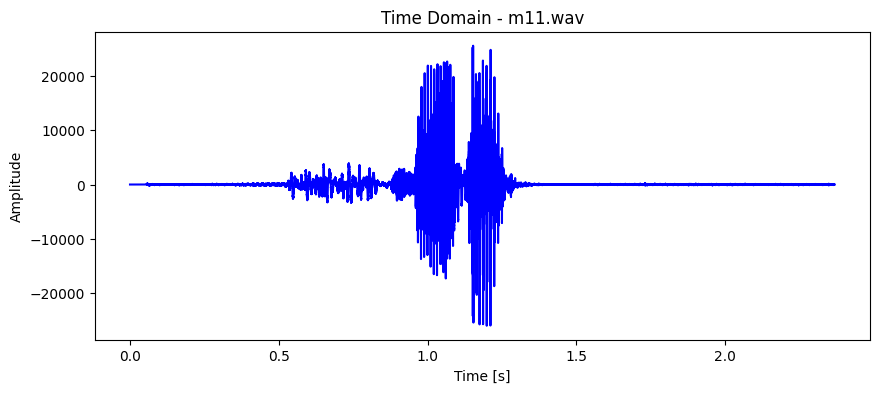

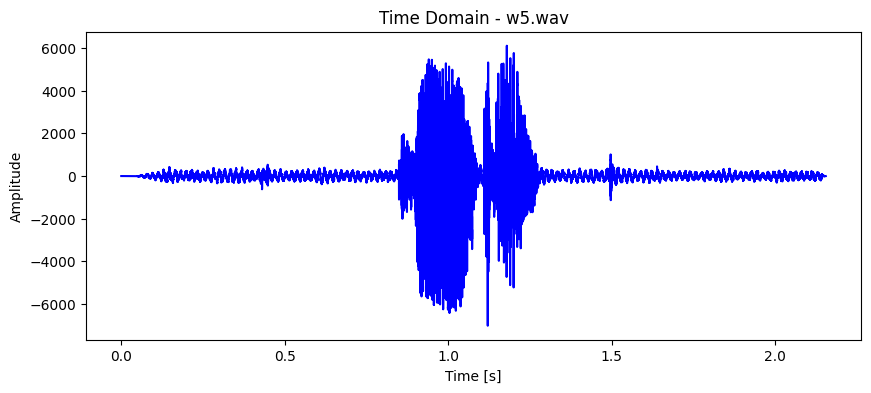

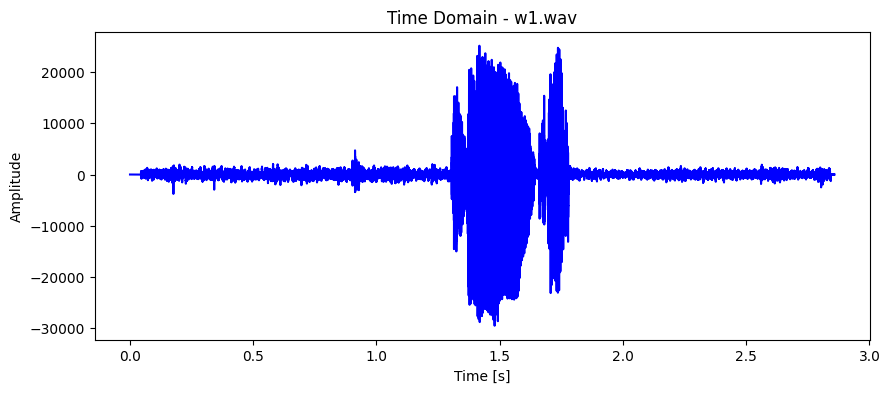

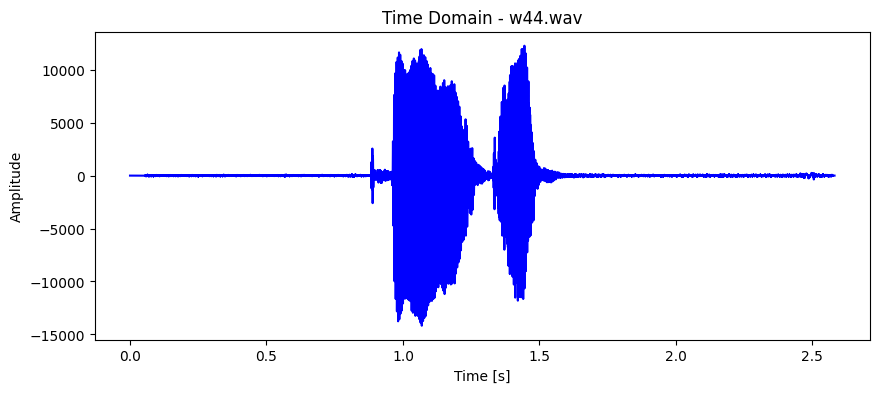

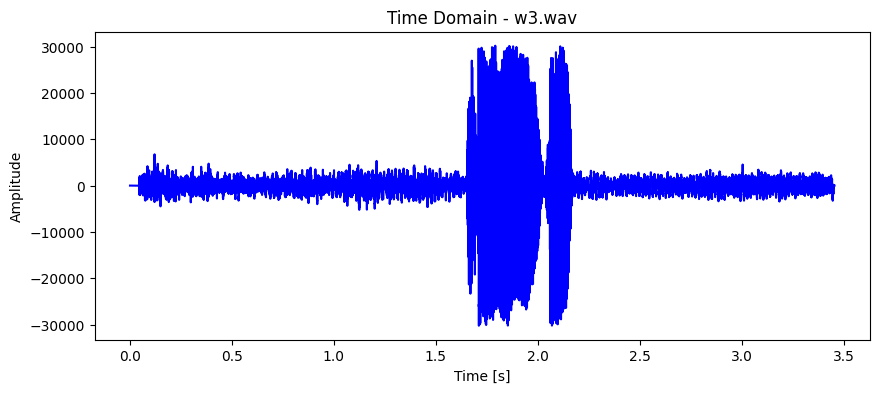

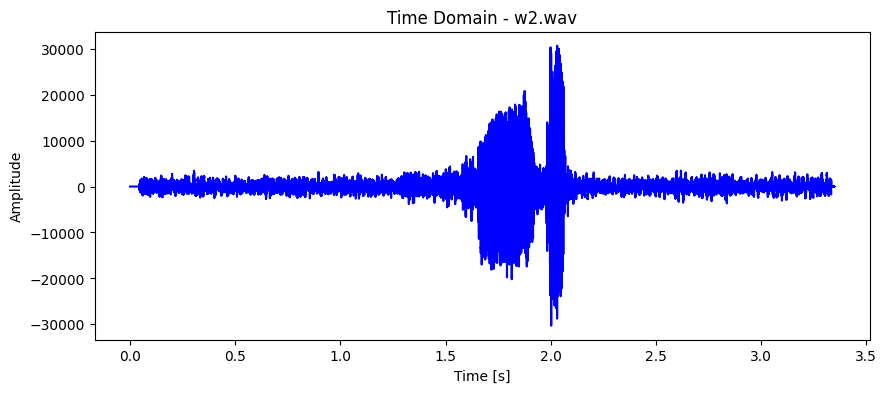

In [94]:
for file in accurate_wav_files:
    sample_rate, data = wavfile.read(file)

    time = np.linspace(0, len(data) / sample_rate, num=len(data))

    draw_time_domain_graph(sample_rate, data, file)

# Denoise 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



## 

In [169]:
## Load a single file
sample_rate, data = wavfile.read('fm_1.wav')

In [157]:
## Compute the Fast Fourier Transform (FFT)
t = np.linspace(0, len(data) / sample_rate, num=len(data))
n = len(t)
fhat = np.fft.fft(data, n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(1/sample_rate * n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')

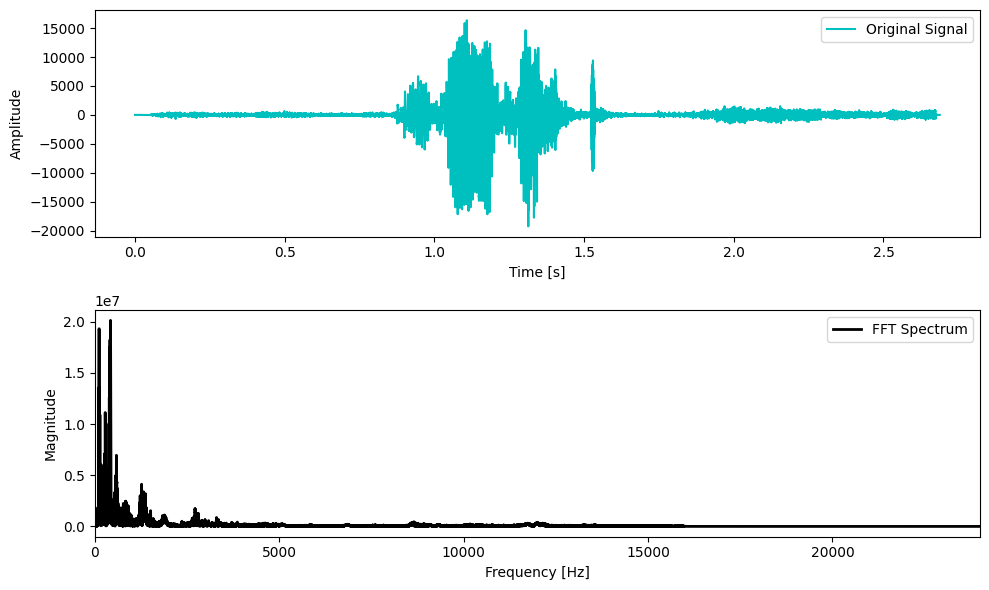

In [158]:
# Plot Time Domain Signal
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

plt.sca(axs[0])
plt.plot(t, data, color='c', linewidth=1.5, label='Original Signal')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

# Plot Frequency Domain (FFT)
plt.sca(axs[1])
plt.plot(freq[L], np.abs(fhat[L]), color='k', linewidth=2, label='FFT Spectrum')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.xlim(0, sample_rate // 2)
plt.legend()

plt.tight_layout()
plt.show()

In [173]:
fhat_filtered = np.where(PSD > 10000000, fhat, 0)
ffilt = np.fft.ifft(fhat_filtered)

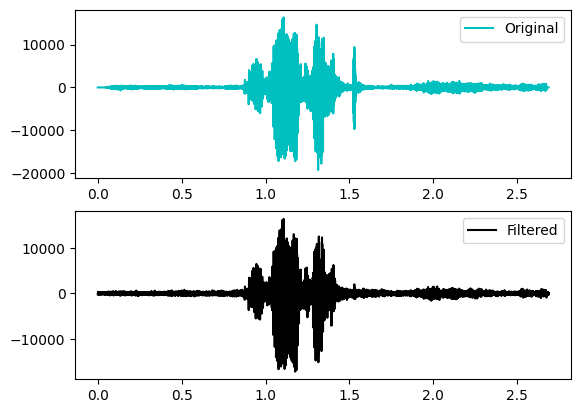

In [174]:
fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,data, color='c', label='Original')
plt.legend()

plt.sca(axs[1])
plt.plot(t, ffilt, color='k', label='Filtered')
plt.legend()

plt.show()
    

In [175]:
# Define parameters
cleaned_data = np.real(ffilt)  # Ensure data is real (remove any imaginary part)

# Normalize audio to 16-bit PCM format (-32768 to 32767)
cleaned_data = cleaned_data / np.max(np.abs(cleaned_data))  # Scale between -1 and 1
cleaned_data = (cleaned_data * 32767).astype(np.int16)  # Convert to 16-bit PCM format

# Save as WAV file
wavfile.write("cleaned_audio.wav", sample_rate, cleaned_data)

print("Denoised audio saved as cleaned_audio.wav")


Denoised audio saved as cleaned_audio.wav
